In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Load the dataset (replace 'your_dataset.csv' with the path to your dataset)
data = pd.read_csv(r"C:\Users\admin\Downloads\Social_Network_Ads.csv")
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [25]:
# Separate features and target variable
X = data.drop(columns=["Purchased"])
y = data["Purchased"]

In [26]:
# Preprocessing
# Encoding categorical variables
label_encoder = LabelEncoder()
X["Gender"] = label_encoder.fit_transform(X["Gender"])

In [27]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Define the Classification model
classification_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [35]:
# Compile the model
classification_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
## Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test))

Epoch 1/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1746 - accuracy: 0.9250 - val_loss: 0.2470 - val_accuracy: 0.9125
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1733 - accuracy: 0.9281 - val_loss: 0.2325 - val_accuracy: 0.9125
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1723 - accuracy: 0.9250 - val_loss: 0.2325 - val_accuracy: 0.9125
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1719 - accuracy: 0.9312 - val_loss: 0.2399 - val_accuracy: 0.9125
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1701 - accuracy: 0.9281 - val_loss: 0.2385 - val_accuracy: 0.9125
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1701 - accuracy: 0.9250 - val_loss: 0.2339 - val_accuracy: 0.9125
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1700 - accuracy: 0.9312 - val_loss: 0.2372 - val_accuracy: 0.9125
Epoch 8/100
1

In [51]:
# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Classification Loss:", loss)
print("Classification Accuracy:", accuracy)

3/3 [==============================] - 0s 2ms/step - loss: 0.2551 - accuracy: 0.8875
Classification Loss: 0.255098819732666
Classification Accuracy: 0.887499988079071


3/3 [==============================] - 0s 999us/step


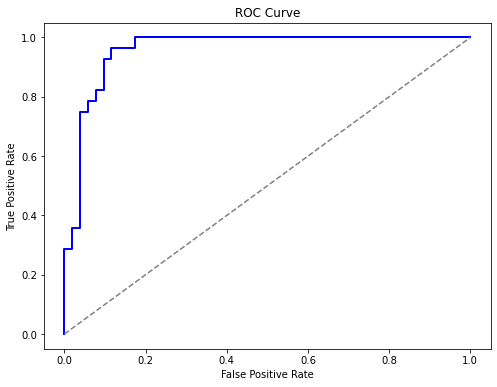

In [52]:
# Generate ROC curve
y_pred_prob = model.predict(X_test_scaled).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [53]:
# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC Score:", auc_score)

AUC Score: 0.9581043956043955


In [63]:
# Generate confusion matrix
y_pred = np.round(y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[47  5]
 [ 4 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        52
           1       0.83      0.86      0.84        28

    accuracy                           0.89        80
   macro avg       0.87      0.88      0.88        80
weighted avg       0.89      0.89      0.89        80



In [64]:
# Plot training and testing accuracy and loss
plt.figure(figsize=(12, 6))

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

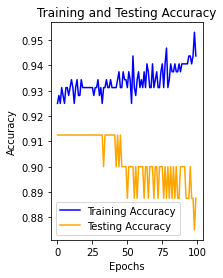

In [65]:
# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy', color='orange')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

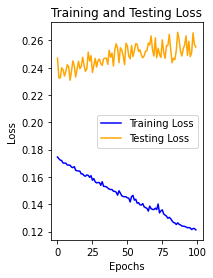

In [66]:
# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Testing Loss', color='orange')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [67]:
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>